In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_csv("/content/weather with dates.csv")

In [0]:
weather_data.head(2)

,Year,Average of Avg. Temperature in Kelvin,Average of NDVI Avg. Number of pixel,Average of SNOW Avg. Number of Pixels
0,01-01-2001,271.344059,9418.25,6790.325
1,01-02-2001,273.913663,12998.90,6497.100


In [0]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
Year                                     204 non-null object
Average of Avg. Temperature in Kelvin    204 non-null float64
Average of NDVI Avg. Number of pixel     204 non-null float64
Average of SNOW Avg. Number of Pixels    204 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB


In [0]:
input_feature= weather_data.iloc[:,[1,2]].values
input_data = input_feature

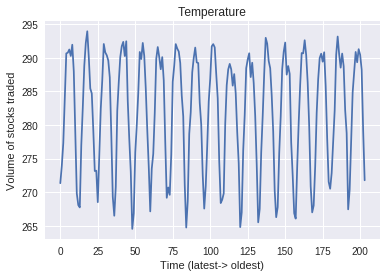

In [0]:
plt.plot(input_feature[:,0])
plt.title("Temperature")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

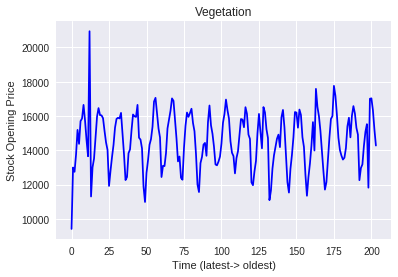

In [0]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Vegetation")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 60
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,1])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(144, 60, 2)
(61, 60, 2)


In [0]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(units=120, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=120, return_sequences=True))
model.add(LSTM(units=120))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 120)           59040     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 120)           115680    
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 121       
Total params: 290,521
Trainable params: 290,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [0]:
model.fit(X, y, epochs=150, batch_size=32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
144/144 [==============================] - 7s 49ms/step - loss: 0.1092
Epoch 2/150
144/144 [==============================] - 3s 21ms/step - loss: 0.0368
Epoch 3/150
144/144 [==============================] - 3s 20ms/step - loss: 0.0369
Epoch 4/150
144/144 [==============================] - 3s 19ms/step - loss: 0.0272
Epoch 5/150
144/144 [==============================] - 3s 21ms/step - loss: 0.0225
Epoch 6/150
144/144 [==============================] - 3s 20ms/step - loss: 0.0244
Epoch 7/150
144/144 [==============================] - 3s 20ms/step - loss: 0.0217
Epoch 8/150
144/144 [==============================] - 3s 21ms/step - loss: 0.0228
Epoch 9/150
144/144 [==============================] - 3s 20ms/step - loss: 0.0215
Epoch 10/150
144/144 [==============================] - 3s 19ms/step - loss: 0.0216
Epoch 11/150
144/144 [==============================] - 3s 19ms/step - loss: 0.0206
Epoch 12/150
144/144 [===============

In [0]:
predicted_value= model.predict(X_test)


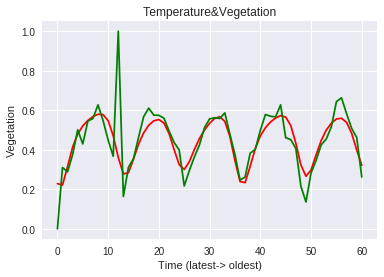

In [0]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:61,1], color='green')
plt.title("Temperature&Vegetation")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Vegetation")
plt.show()

In [0]:
#input_data[:61,1]



In [0]:
import sklearn
from sklearn import metrics
sklearn.metrics.r2_score(input_data[:61,1], predicted_value, sample_weight=None, multioutput='uniform_average')

0.5612169072150675

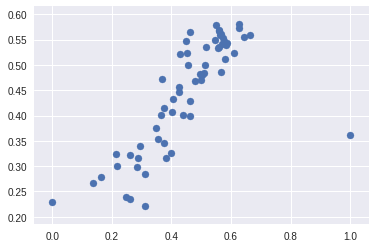

In [0]:
plt.scatter(input_data[:61,1],predicted_value)